In [2]:
#Importando las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

In [168]:
#Leyendo la data
df_salary = pd.read_csv('../data/Salary_data.csv')
df_salary.shape #Observamos los nombres de sus columnas

(62642, 29)

In [169]:
df_salary.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

In [170]:
#Seleccionamos las columnas con las que trabajaremos
selected_columns = ['company','title','totalyearlycompensation','location','yearsofexperience','yearsatcompany','tag','basesalary','stockgrantvalue',
                    'bonus','gender','Race','Education']

In [171]:
#Creamos una nueva tabla para trabajar con ella
df = df_salary[selected_columns].copy()
df.shape

(62642, 13)

In [172]:
df.describe().round(2)

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus
count,62642.00,62642.00,62642.00,62642.00,62642.00,62642.00
mean,216300.37,7.20,2.70,136687.28,51486.08,19334.75
std,138033.75,5.84,3.26,61369.28,81874.57,26781.29
min,10000.00,0.00,0.00,0.00,0.00,0.00
25%,135000.00,3.00,0.00,108000.00,0.00,1000.00
50%,188000.00,6.00,2.00,140000.00,25000.00,14000.00
75%,264000.00,10.00,4.00,170000.00,65000.00,26000.00
max,4980000.00,69.00,69.00,1659870.00,2800000.00,1000000.00


In [173]:
df.isnull().sum()

company                        5
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
Race                       40215
Education                  32272
dtype: int64

In [174]:
df.gender.unique() #Obervamos algo inusual dentro del género: "Título: Ingeniero de software senior", KHAAAAAAAA

array([nan, 'Male', 'Female', 'Other', 'Title: Senior Software Engineer'],
      dtype=object)

In [175]:
df.groupby(['gender']).count()

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,Race,Education
gender,,,,,,,,,,,,
Female,6999,6999,6999,6999,6999,6999,6957,6999,6999,6999,4034,4910
Male,35698,35702,35702,35702,35702,35702,35399,35702,35702,35702,18166,22679
Other,400,400,400,400,400,400,398,400,400,400,111,177
Title: Senior Software Engineer,1,1,1,1,1,1,1,1,1,1,0,0


In [176]:
df = df.replace(to_replace='Title: Senior Software Engineer', value='No especificado')
df.groupby(['gender']).count() #Verificamos

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,Race,Education
gender,,,,,,,,,,,,
Female,6999,6999,6999,6999,6999,6999,6957,6999,6999,6999,4034,4910
Male,35698,35702,35702,35702,35702,35702,35399,35702,35702,35702,18166,22679
No especificado,1,1,1,1,1,1,1,1,1,1,0,0
Other,400,400,400,400,400,400,398,400,400,400,111,177


In [177]:
#Como obersvamos que los valores nulos se encuentran dentro de las columnas de tipo texto, les hacemos un filtro básico
df_filtrado = df.fillna({'company':'No especificado','tag':'No especificado','gender':'No especificado','Race':'No especificado','Education':'No especificado',})
df = df_filtrado
df.isnull().sum()

company                    0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
tag                        0
basesalary                 0
stockgrantvalue            0
bonus                      0
gender                     0
Race                       0
Education                  0
dtype: int64

<AxesSubplot:>

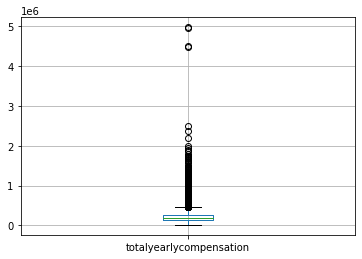

In [178]:
df.boxplot('totalyearlycompensation') #Se observa un sesgo en cuanto a la recolección de datos, contamos con demasiados valores atípicos

In [179]:
#new_df = df[df['totalyearlycompensation'].between(df['totalyearlycompensation'].quantile(.05),df['totalyearlycompensation'].quantile(.95))]

In [180]:
#Agrupamos las columnas con sus respectivos valores (numéricos y textos)
numeric_columns = df.select_dtypes(include=[float, int]).columns
text_columns = df.select_dtypes(include=[object]).columns

numeric_columns, text_columns

(Index(['totalyearlycompensation', 'yearsofexperience', 'yearsatcompany',
        'basesalary', 'stockgrantvalue', 'bonus'],
       dtype='object'),
 Index(['company', 'title', 'location', 'tag', 'gender', 'Race', 'Education'], dtype='object'))

In [181]:
#upper_limit = df[column].mean() + 3 * df[column].std()
#df[column+’_sin_outliers’] = df[df[column] < upper_limit]

In [182]:
#Identificamos los outliers
def encontrando_outliers(x, upper_limit):
    if x > upper_limit:
        return 1
    else: return 0

#Duplicamos las columnas que contienen outliers, identificándolos con el sufijo "_outliers"
for column in numeric_columns:
    upper_limit = df[column].mean() + 3 * df[column].std()
    df[column+"_outliers"] = df[column].apply(lambda x: encontrando_outliers(x, upper_limit))

In [183]:
#Agrupamos las columnas que contengan outliers
outlier_columns = [column for column in df.columns if "outlier" in column]
outlier_columns

['totalyearlycompensation_outliers',
 'yearsofexperience_outliers',
 'yearsatcompany_outliers',
 'basesalary_outliers',
 'stockgrantvalue_outliers',
 'bonus_outliers']

In [189]:
# Eliminamos los outliers
df["outlier"] = df[outlier_columns].sum(axis=1)
df = df[df["outlier"]==0].reset_index(drop=True).copy()

In [190]:
df = df.drop(outlier_columns+["outlier"], axis=1).copy()
df.shape

(58362, 13)

<AxesSubplot:>

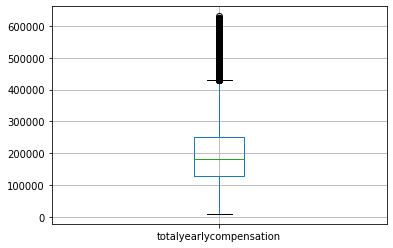

In [191]:
df.boxplot('totalyearlycompensation')

In [ ]:
#df.to_csv('Data_limpia.csv',index = False)

# 

## Análisis exploratorio de datos (EDA)

In [118]:
profile = pp.ProfileReport(df, title='Pandas Profiling Report', minimal=True)

In [120]:
profile.to_file('../data/reports/Data_salary.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 333.01it/s]


#### Preguntas de exploración

1. ¿Qué variables influyen en el valor facturado por los profesionales?
* Salario anual de acuerdo a:
- Nivel de educación
- Género
- Cargo
- Empresa
- Experiencia
2. ¿Cuál es el % de participación por genero en este campo?

In [192]:
df.columns

Index(['company', 'title', 'totalyearlycompensation', 'location',
       'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'Race', 'Education'],
      dtype='object')

In [229]:
salario_anual = df.groupby(['totalyearlycompensation']).mean()

In [228]:
nivel_educacion = df.groupby(['Education','totalyearlycompensation']).size()
nivel_educacion

Education          totalyearlycompensation
Bachelor's Degree  10000                      27
                   11000                      12
                   12000                      22
                   13000                      13
                   14000                      15
                                              ..
Some College       495000                      1
                   510000                      1
                   513000                      1
                   541000                      1
                   586000                      1
Length: 2369, dtype: int64

In [ ]:
data = pd.concat([new_df_salary['totalyearlycompensation'],new_df_salary['educacion']], axis=1)

In [144]:
#Se agrupa por compañía
x_compania = df.groupby(['company']).mean()
x_compania.head()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus
company,,,,,,
10x Genomics,193333.333333,3.166667,0.666667,149666.666667,27666.666667,15166.666667
23andMe,153428.571429,3.142857,0.857143,116428.571429,17000.000000,0.000000
2U,145571.428571,8.000000,2.428571,129142.857143,3428.571429,13000.000000
3M,118857.142857,7.190476,3.333333,107190.476190,2666.666667,9190.476190
3m,115666.666667,6.666667,5.333333,108666.666667,0.000000,7000.000000


<AxesSubplot:xlabel='company'>

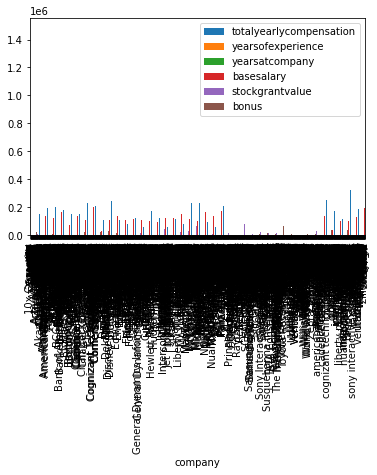

In [154]:
x_compania.plot.bar()

In [157]:
top_company= df["company"].value_counts().reset_index()
top_company.columns = ["company", "totalyearlycompensation"]
top_company

,company,totalyearlycompensation
0,Amazon,8126
1,Microsoft,5216
2,Google,4330
3,Facebook,2990
4,Apple,2028
...,...,...
1627,Samsung research America,1
1628,Bny Mellon,1
1629,Bloomberg lp,1
1630,yelp,1


In [148]:
prom_sal_anual = pd.concat([df['totalyearlycompensation'],df['company']], axis = 1)
prom_sal_anual

,totalyearlycompensation,company
0,127000,Oracle
1,100000,eBay
2,310000,Amazon
3,372000,Apple
4,157000,Microsoft
...,...,...
62637,327000,Google
62638,237000,Microsoft
62639,220000,MSFT
62640,280000,Salesforce


In [143]:
df.groupby(['company']).mean()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus
company,,,,,,
10x Genomics,193333.333333,3.166667,0.666667,149666.666667,27666.666667,15166.666667
23andMe,153428.571429,3.142857,0.857143,116428.571429,17000.000000,0.000000
2U,145571.428571,8.000000,2.428571,129142.857143,3428.571429,13000.000000
3M,118857.142857,7.190476,3.333333,107190.476190,2666.666667,9190.476190
3m,115666.666667,6.666667,5.333333,108666.666667,0.000000,7000.000000
...,...,...,...,...,...,...
zoom,100000.000000,2.000000,6.000000,0.000000,0.000000,0.000000
zoominfo,150000.000000,13.000000,0.000000,145000.000000,5000.000000,0.000000
zoox,228666.666667,10.333333,3.333333,191666.666667,27000.000000,10000.000000


In [60]:
df.gender.unique()

array(['No especificado', 'Male', 'Female', 'Other',
       'Title: Senior Software Engineer'], dtype=object)